In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Загрузим уже обработанные в прошлом ДЗ данные!

In [13]:
df = pd.read_csv('/content/drive/MyDrive/ML/02/15/processed_sigma.csv')
df = df.drop("Trip_ID", axis=1)

X = df.drop("Surge_Pricing_Type", axis=1)
y = df["Surge_Pricing_Type"]

In [15]:
X.isna().sum()

Trip_Distance                    0
Customer_Since_Months            0
Life_Style_Index                 0
Customer_Rating                  0
Cancellation_Last_1Month         0
Var1                             0
Var2                             0
Var3                             0
Type_of_Cab_B                    0
Type_of_Cab_C                    0
Type_of_Cab_D                    0
Type_of_Cab_E                    0
Confidence_Life_Style_Index_B    0
Confidence_Life_Style_Index_C    0
Destination_Type_B               0
Destination_Type_C               0
Destination_Type_D               0
Destination_Type_E               0
Destination_Type_F               0
Destination_Type_G               0
Destination_Type_H               0
Destination_Type_I               0
Destination_Type_J               0
Destination_Type_K               0
Destination_Type_L               0
Destination_Type_M               0
Destination_Type_N               0
Gender_Male                      0
dtype: int64

### Principal component analysis (PCA)

**Задание 1.** Спроецируйте данные на двумерную плоскость, используя `PCA`. Другими словами, выделите первые две главные компоненты и изобразите данные в осях этих компонент. Не забудьте центрировать признаки перед применением метода. 

**Какую долю изначальной дисперсии (информации) содержат/объясняют в себе обе компоненты?** Для этого воспользуйтесь атрибутом `explained_variance_ratio_` у PCA-класса.

In [16]:
pd.options.display.max_columns = 500
print(df.shape)
df.head(3)

(131662, 29)


,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Type_of_Cab_B,Type_of_Cab_C,Type_of_Cab_D,Type_of_Cab_E,Confidence_Life_Style_Index_B,Confidence_Life_Style_Index_C,Destination_Type_B,Destination_Type_C,Destination_Type_D,Destination_Type_E,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male,Surge_Pricing_Type
0,6.77,1.0,2.42769,3.90500,0,40.0,46,60,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
1,29.47,10.0,2.78245,3.45000,0,38.0,56,78,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2
2,41.58,10.0,2.79805,3.50125,2,61.0,56,77,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2


In [17]:
### Центрируем данные

### Your code is here

X_centered = X - X.mean()

In [18]:
X_centered.head(3)

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Type_of_Cab_B,Type_of_Cab_C,Type_of_Cab_D,Type_of_Cab_E,Confidence_Life_Style_Index_B,Confidence_Life_Style_Index_C,Destination_Type_B,Destination_Type_C,Destination_Type_D,Destination_Type_E,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
0,-37.430909,-5.015912,-0.373758,1.055542,-0.782838,-22.474883,-5.2028,-15.099019,0.610017,-0.213592,-0.144241,-0.088363,-0.459875,-0.273177,-0.224476,-0.056843,-0.050037,-0.020636,-0.014811,-0.011309,-0.00957,-0.006175,-0.005279,-0.005165,-0.004884,-0.000706,-0.000744,-0.71319
1,-14.730909,3.984088,-0.018998,0.600542,-0.782838,-24.474883,4.7972,2.900981,0.610017,-0.213592,-0.144241,-0.088363,0.540125,-0.273177,-0.224476,-0.056843,-0.050037,-0.020636,-0.014811,-0.011309,-0.00957,-0.006175,-0.005279,-0.005165,-0.004884,-0.000706,-0.000744,0.28681
2,-2.620909,3.984088,-0.003398,0.651792,1.217162,-1.474883,4.7972,1.900981,0.610017,-0.213592,-0.144241,-0.088363,0.540125,-0.273177,-0.224476,-0.056843,-0.050037,0.979364,-0.014811,-0.011309,-0.00957,-0.006175,-0.005279,-0.005165,-0.004884,-0.000706,-0.000744,0.28681


In [19]:
from sklearn.decomposition import PCA

### Your code is here


pca = PCA(n_components=2)
PCA_dataset = pca.fit_transform(X)
PCA_dataset = pd.DataFrame(PCA_dataset, columns=['PCA_1', 'PCA_2'])

PCA_dataset.head(3)

,PCA_1,PCA_2
0,-38.743132,-23.282634
1,-13.209252,-25.023815
2,-2.004910,-1.637085


In [20]:
### В ответе укажите какую долю дисперсии объясняют первая и вторая компоненты без округления через запятую.
pca.explained_variance_ratio_

array([0.63176117, 0.21129863])

**Задание 2.** Изобразите heatmap корреляции изначальных признаков с новыми двумя главными компонентами. \
**Какие признаки коррелируют с первой компонентой? Какие со второй? В качестве порогового значения договоримся о корреляции >= 0.5 по абсолютному значению **


In [21]:
### Your code is here
first_component_corr = X.corrwith(PCA_dataset.PCA_1)
second_component_corr = X.corrwith(PCA_dataset.PCA_2)

corr = pd.concat((first_component_corr, second_component_corr), axis=1)

corr.columns = ['PCA_1', 'PCA_2']

print(f"{corr[corr.PCA_1 > 0.5]['PCA_1']},\n {corr[corr.PCA_2 > 0.5]['PCA_2']}")


Trip_Distance    0.997767
Name: PCA_1, dtype: float64,
 Var1    0.9986
Name: PCA_2, dtype: float64


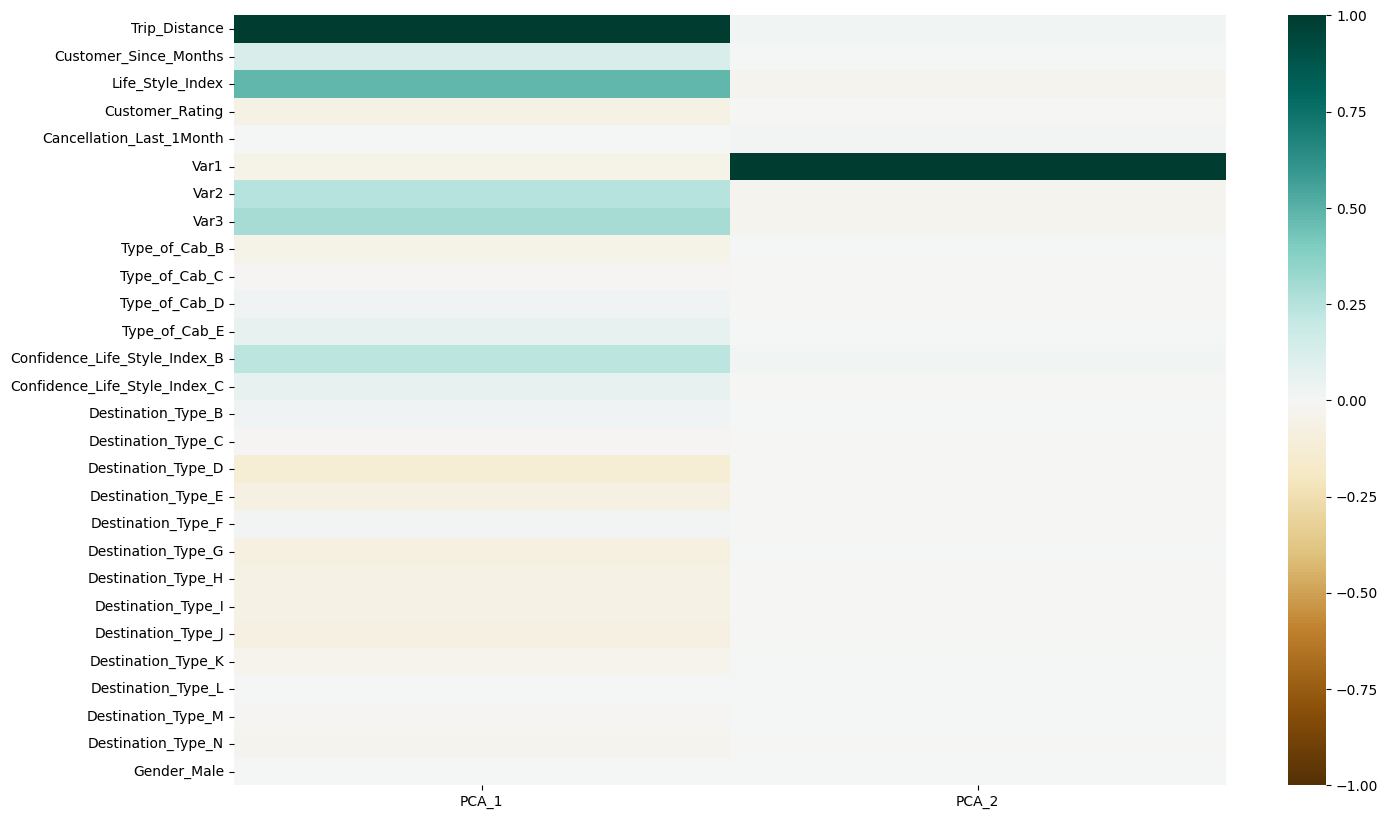

In [22]:
import seaborn as sns

fig = plt.figure()

fig.set_size_inches(16, 10)

sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.index,
            cmap='BrBG',
            vmin=-1,
            vmax=1)

plt.show()

**Задание 3.** Изобразите двумерную проекцию данных с метками классов. Выделите третью главную компоненту и аналогично нарисуйте трехмерную проекцию с метками классов. \
**Какие признаки коррелируют с третьей компонентой?**

In [23]:
### Your code is here

### соберем данные : с PCA_dataset и таргетом
PCA_dataset = np.concatenate((PCA_dataset.values, y.values.reshape(-1, 1)), axis=1)

### назовем колонки

PCA_dataset = pd.DataFrame(PCA_dataset, columns=['PCA_1', 'PCA_2', 'Surge_Pricing_Type'])
PCA_dataset


,PCA_1,PCA_2,Surge_Pricing_Type
0,-38.743132,-23.282634,2.0
1,-13.209252,-25.023815,2.0
2,-2.004910,-1.637085,2.0
3,17.178458,-0.907657,3.0
4,14.477389,-11.656752,2.0
...,...,...,...
131657,-32.267779,-2.482906,3.0
131658,32.621206,-0.886322,2.0
131659,-4.045367,-1.565545,2.0
131660,3.696395,-15.487904,2.0


<Axes: xlabel='PCA_1', ylabel='PCA_2'>

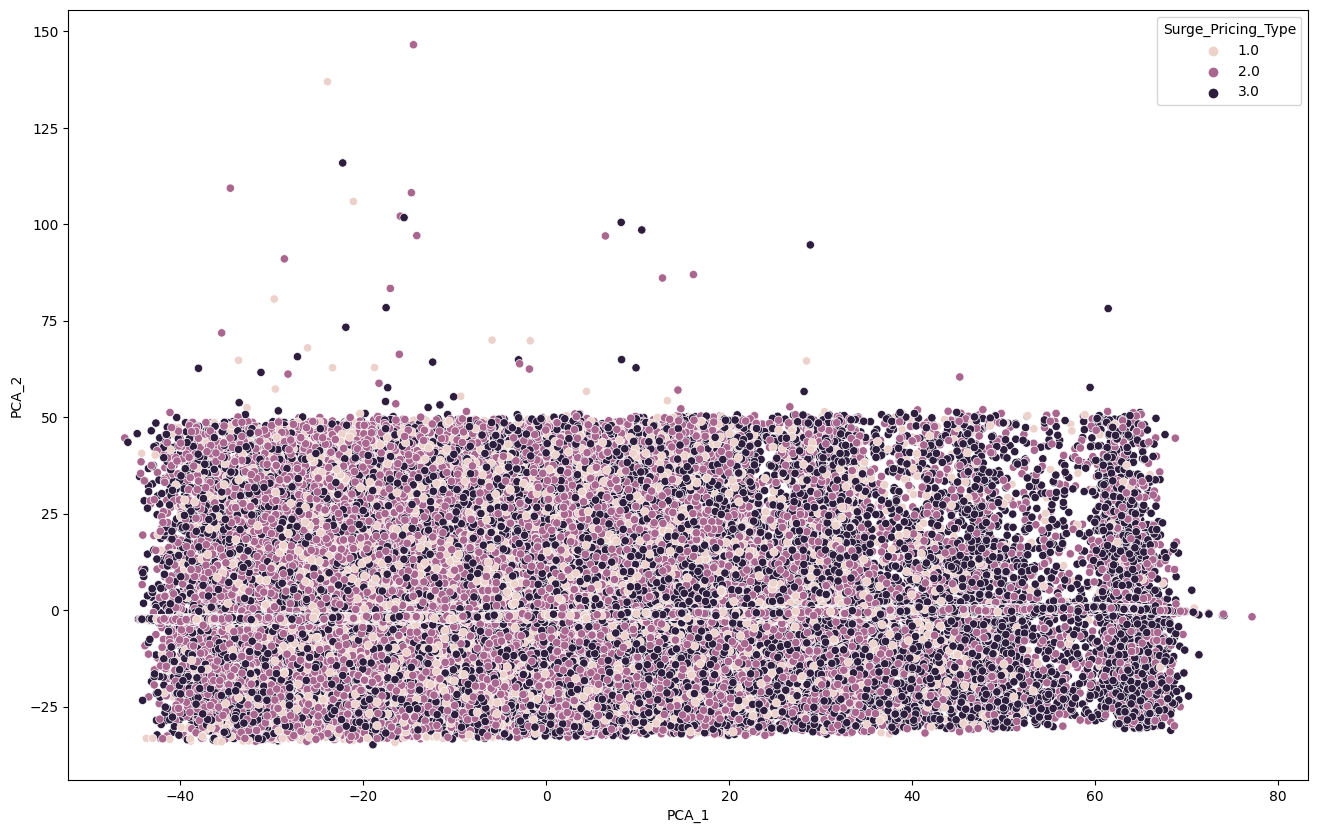

In [24]:
import seaborn as sns

fig = plt.figure()
fig.set_size_inches(16, 10)

sns.scatterplot(data=PCA_dataset, x='PCA_1', y='PCA_2', hue='Surge_Pricing_Type')

In [25]:
### Проверем для 3 компонент

pca_3d = PCA(n_components=3)

pca_3d.fit(X)

PCA_dataset_3d = pca_3d.transform(X)
PCA_dataset_3d = pd.DataFrame(PCA_dataset_3d, columns=['PCA_1', 'PCA_2', 'PCA_3'])

PCA_dataset_3d.head(3)


,PCA_1,PCA_2,PCA_3
0,-38.743132,-23.282634,-11.303274
1,-13.209252,-25.023815,5.664106
2,-2.004910,-1.637085,3.663032


In [26]:
### посмотрим что содержится в новых признаках


first_component_corr_3d = X.corrwith(PCA_dataset_3d.PCA_1)
second_component_corr_3d = X.corrwith(PCA_dataset_3d.PCA_2)
third_component_corr_3d = X.corrwith(PCA_dataset_3d.PCA_3)

corr_3d = pd.concat( (first_component_corr_3d,
                     second_component_corr_3d,
                     third_component_corr_3d), 
                    axis=1)

corr_3d.columns = ['PCA_1', 'PCA_2', 'PCA_3']

corr_3d.sort_values('PCA_3')

,PCA_1,PCA_2,PCA_3
Customer_Rating,-0.070104,-0.003757,-0.236793
Trip_Distance,0.997767,0.018410,-0.064176
Destination_Type_F,0.008832,-0.005805,-0.031646
Type_of_Cab_E,0.069302,0.000254,-0.024079
Destination_Type_K,-0.033570,0.001483,-0.019527
Type_of_Cab_D,0.030079,-0.003183,-0.019453
Destination_Type_E,-0.070717,-0.003479,-0.018844
Destination_Type_D,-0.132203,-0.003049,-0.016059
Destination_Type_G,-0.079850,0.000093,-0.013557
Destination_Type_L,0.005635,0.003158,-0.011154


In [27]:
print(f"3: \n{corr_3d[corr_3d.PCA_3 > 0.5]['PCA_3']}")
### признак Var3 наиболее коррелирует, но убедимся на тепловой карте еще раз

3: 
Var2    0.705159
Var3    0.951081
Name: PCA_3, dtype: float64


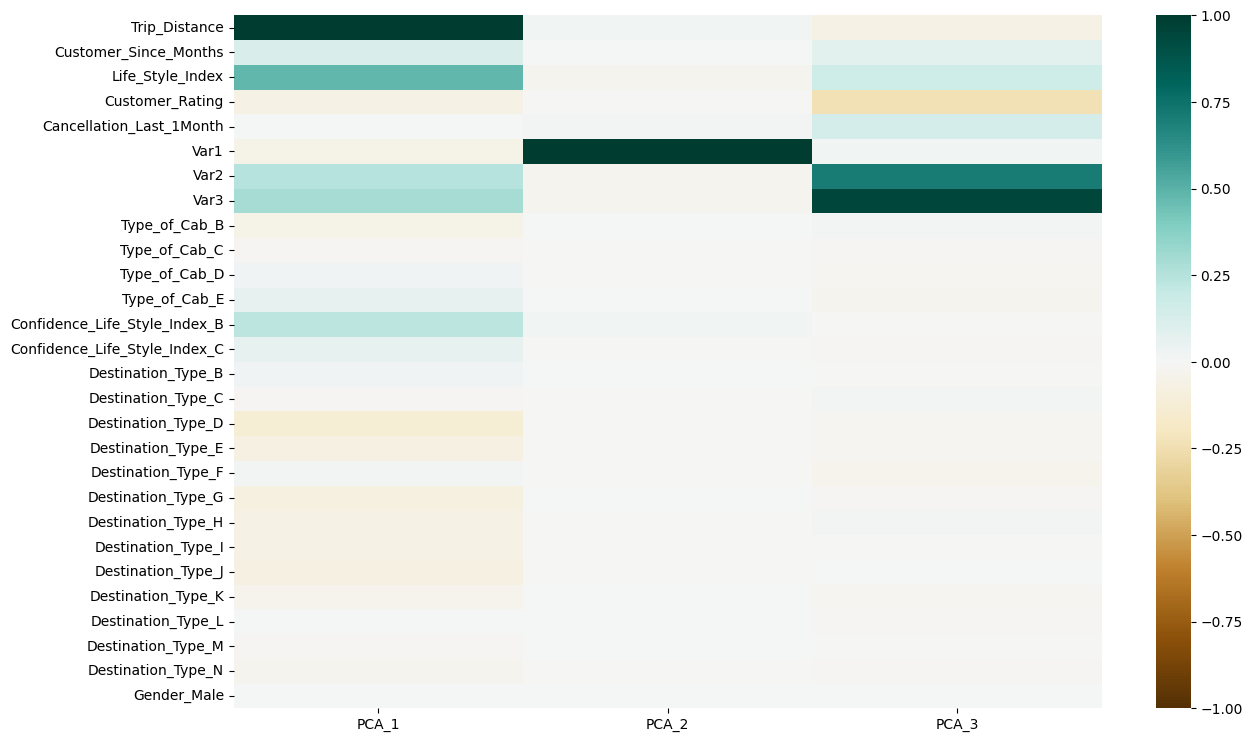

In [28]:
import seaborn as sns

fig = plt.figure()

fig.set_size_inches(14, 9)

sns.heatmap(corr_3d, 
            xticklabels=corr_3d.columns,
            yticklabels=corr_3d.index,
            cmap='BrBG',
            vmin=-1,
            vmax=1)

plt.show()

In [29]:
PCA_dataset_3d = np.concatenate((PCA_dataset_3d.values, y.values.reshape(-1, 1)),
                               axis=1)
PCA_dataset_3d = pd.DataFrame(PCA_dataset_3d, columns=['PCA_1', 'PCA_2', 'PCA_3', 'Surge_Pricing_Type'])

PCA_dataset_3d.head(3)

,PCA_1,PCA_2,PCA_3,Surge_Pricing_Type
0,-38.743132,-23.282634,-11.303274,2.0
1,-13.209252,-25.023815,5.664106,2.0
2,-2.004910,-1.637085,3.663032,2.0


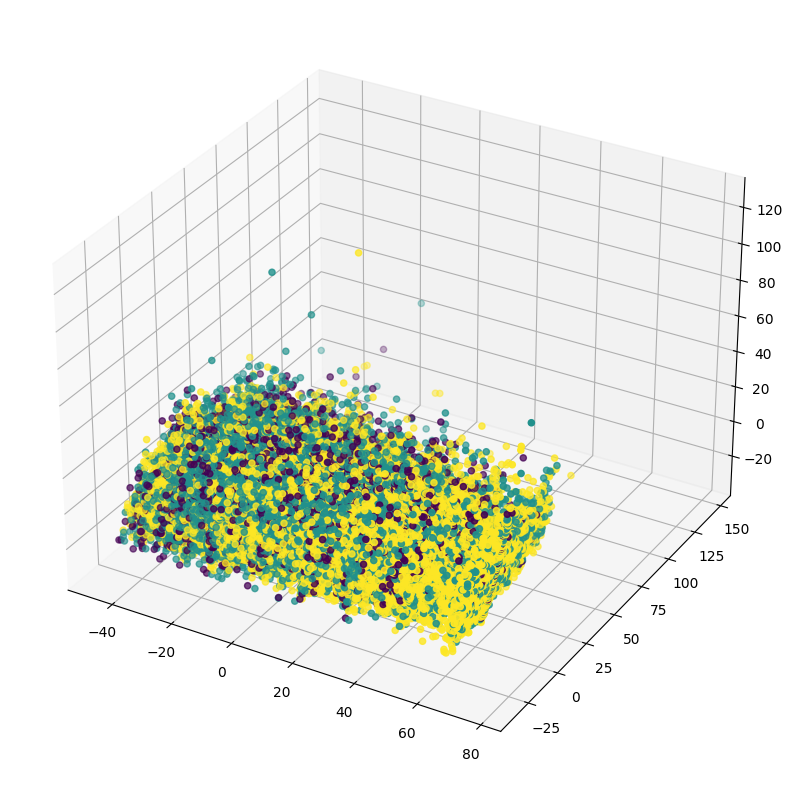

In [30]:
### построим 3D график

fig = plt.figure()
fig.set_size_inches(16, 10)

ax = plt.axes(projection='3d')

colors = PCA_dataset_3d['Surge_Pricing_Type'].replace(['1', '2', '3'],
                                            ['orange', 'green', 'red'])

ax.scatter3D(PCA_dataset_3d['PCA_1'], 
             PCA_dataset_3d['PCA_2'],
             PCA_dataset_3d['PCA_3'], 
             c=colors)

Советуем еще и замерить попарные корреляции между главными компонентами! Это поможет в ответе на один из тестовых вопросов.

In [31]:
### Your code is here

pci_3d_1 = PCA_dataset_3d.corrwith(PCA_dataset_3d.PCA_1)
pci_3d_2 = PCA_dataset_3d.corrwith(PCA_dataset_3d.PCA_2)
pci_3d_3 = PCA_dataset_3d.corrwith(PCA_dataset_3d.PCA_3)

corr_3d_between = pd.concat( (pci_3d_1,
                     pci_3d_2,
                     pci_3d_3), 
                    axis=1)

corr_3d_between.columns = ['PCA_1', 'PCA_2', 'PCA_3']

#corr_3d.sort_values('PCA_3')

corr_3d_between

,PCA_1,PCA_2,PCA_3
PCA_1,1.000000e+00,1.290503e-16,8.788947e-17
PCA_2,1.290503e-16,1.000000e+00,3.006287e-16
PCA_3,8.788947e-17,3.006287e-16,1.000000e+00
Surge_Pricing_Type,1.313990e-01,-5.754804e-03,-7.769403e-02


**Задание 4.** Обучите логистическую регрессию на первых двух компонентах центрированных данных и подберите гиперпараметры. Обучите логистическую регрессию на центрированных данных и подберите гиперпараметры. **Сравните метрику accuracy и f1-score на тестовой выборке в двух моделях**.

P.S. для удобства, скорости и нормализации данных (понадобится, так как захотим повалидироваться на параметрах регуляризации) можно построить конструкцию Pipeline c 3 следующими степами: StandardScaler -> PCA -> LogisticRegression

In [32]:
np.random.seed(2022)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_centered, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [34]:
### Your code is here

### обучаем logreg на первых двух компонентах центрированных данных и подбираем гиперпараметры

param_grid = {'model__penalty': ['l1', 'l2', 'elasticnet'],
               'model__C': [1e-5, 0.0001, 0.001, 0.01]}

pipe_pca = Pipeline([("scaler", StandardScaler()),
                 ("PCA", PCA(n_components=2)),
                 ("model", LogisticRegression())])

pipe_pca.fit(X_train, y_train)
search_pca = GridSearchCV(pipe_pca, param_grid)

search_pca.fit(X_train, y_train)

print(f"Best parameter (CV score={search_pca.best_score_:.5f}):")
print(search_pca.best_params_)

#C = 0.0001

Best parameter (CV score=0.48054):
{'model__C': 0.0001, 'model__penalty': 'l2'}


In [35]:
print(classification_report(y_test, search_pca.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.000     0.000     0.000      5372
           2      0.478     0.690     0.565     11349
           3      0.493     0.511     0.502      9612

    accuracy                          0.484     26333
   macro avg      0.324     0.400     0.356     26333
weighted avg      0.386     0.484     0.427     26333



In [36]:
### аналогично обучим модель без выделения главных признаков

pipe_all = Pipeline([("scaler", StandardScaler()),
                 ("model", LogisticRegression())])

pipe_all.fit(X_train, y_train)
search_all = GridSearchCV(pipe_all, param_grid)

search_all.fit(X_train, y_train)

print(f"Best parameter (CV score={search_all.best_score_:.5f}):")
print(search_all.best_params_)

# C = 0.001, penalty = 'l2'

Best parameter (CV score=0.68039):
{'model__C': 0.001, 'model__penalty': 'l2'}


In [37]:
print(classification_report(y_test, search_all.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.746     0.532     0.621      5372
           2      0.636     0.830     0.720     11349
           3      0.736     0.589     0.655      9612

    accuracy                          0.681     26333
   macro avg      0.706     0.650     0.665     26333
weighted avg      0.695     0.681     0.676     26333



Кажется, достаточно сильно теряем в качестве! Может, добавить компонент?

**Задание 5.** Обучите модели логистической регресии на нескольких различных компонентах: [2, 4, 8, 16, 28]. **Нарисуйте графики зависимости accuracy, f1-score от количества компонент. Введите их значения через запятую**. При обучении используйте l2-регуляризацию, гиперпараметр C подбирайте по сетке. 


In [38]:
### Чтобы не заставлять вас писать похожий на предыдущий код,
### Написали функцию, которая будет обучать модель для
### произвольного числа n_components главных компонент.

def train_pca_i(n_components, X_train, y_train):
    pipe = Pipeline([('scaler', StandardScaler()), 
                     ('pca', PCA(n_components=n_components)),
                     ('model', LogisticRegression(penalty='l2', solver='saga',random_state=1))])
    
    param_grid = {'model__C': [0.0001, 0.001, 0.01, 0.1]}
    
    grid = GridSearchCV(pipe, param_grid, cv=5)
    grid.fit(X_train, y_train)
    
    report = classification_report(y_test, grid.predict(X_test), output_dict=True)
    return (report['accuracy'], 
            report['weighted avg']['f1-score'])

In [49]:
%%time
accuracy_dict, f1_score_dict = {}, {}
components_list = [2, 4, 8, 16, 28]

for n_components in components_list:
    accuracy_dict[n_components], f1_score_dict[n_components] = train_pca_i(n_components, X_train, y_train)
    print(f"accuracy for {n_components}: {accuracy_dict[n_components]}")
    print(f"f1-score {n_components}: {f1_score_dict[n_components]}")

    
print(f"accuracy for {n_components}: {accuracy_dict[28]:.3f}\nf1-score: {f1_score_dict[28]:.3f}")
    

accuracy for 2: 0.4849808225420575
f1-score 2: 0.4274980643587912
accuracy for 4: 0.5275130064937531
f1-score 4: 0.46819021520465065
accuracy for 8: 0.5896403751946228
f1-score 8: 0.5240508826399087
accuracy for 16: 0.5923366118558463
f1-score 16: 0.527471775676497
accuracy for 28: 0.6813883720047089
f1-score 28: 0.6760757307801638
accuracy for 28: 0.681
f1-score: 0.676
CPU times: user 2min 48s, sys: 59.4 s, total: 3min 48s
Wall time: 3min 4s


Обычно, когда решается какая-то высокоразмерная предсказательная задача, где тысячи признаков, функция качества PCA моделей похожа на параболу ветвями вниз в зависимости от количества компонент (для совсем маленьких и больших n_component качество маленькое, при этом есть где-то промежуточное значение).

Как думаете, почему здесь у нас непрерывно растущие графики качества?

Может, изначальные признаки были слишком хороши?

### t-SNE

Напомним, что метод заключается в введении некоторых функций, основанных на расстоянии между признаками, которые измеряют близость объектов. Функций, как вы помните, две, и они заданы в исходном и новом пространствах соотвественно. Далее минимизируем дивергенцию Кульбака-Лейблера по координатaм в новом пространстве

**Задание 6.** Обучите t-sne c `n_components=2` на изначальных данных и визуализируйте результаты с учетом известных классов. 

P.S. если устанете ждать обучения TSNE, или упадет ошибка по типу oom, то можно сократить число объектов в датасете до, например, пары тысяч. Это и следующее задания никак проверяться системой не будут. Вам достаточно повторить упражнение с практики и получить какое-то более адекватное (по сравнению с PCA) изображение классов.

In [50]:
### Your code is here
X_ = df.drop("Surge_Pricing_Type", axis=1)
y_ = df["Surge_Pricing_Type"]


In [58]:
X_s = X_.iloc[0:5000].copy()
y_s = y_.iloc[0:5000].copy()

In [63]:
from sklearn.manifold import TSNE

X_tsne = TSNE(n_components=2).fit_transform(X_s)
X_tsne

array([[-20.415636  , -67.92673   ],
       [  0.61917007, -54.558365  ],
       [  6.0044913 ,  -4.5990415 ],
       ...,
       [ -0.9181242 , -17.699932  ],
       [ -6.260407  ,  21.191135  ],
       [-32.927017  ,   5.620245  ]], dtype=float32)

In [66]:
### Преобразуем в pd.DataFrame

X_tsne_ = np.concatenate((X_tsne, y_s.values.reshape(-1, 1)),
                        axis=1)
X_tsne_ = pd.DataFrame(X_tsne_, columns = ['Tsne_1st_component',
                              'Tsne_2nd_component',
                              'SurgePricingType'])
X_tsne_

,Tsne_1st_component,Tsne_2nd_component,SurgePricingType
0,-20.415636,-67.926727,2.0
1,0.619170,-54.558365,2.0
2,6.004491,-4.599041,2.0
3,32.831829,-9.430556,3.0
4,17.323536,-44.358875,2.0
...,...,...,...
4995,-25.821335,-4.769372,2.0
4996,27.939980,-60.954712,2.0
4997,-0.918124,-17.699932,2.0
4998,-6.260407,21.191135,1.0


<Axes: xlabel='Tsne_1st_component', ylabel='Tsne_2nd_component'>

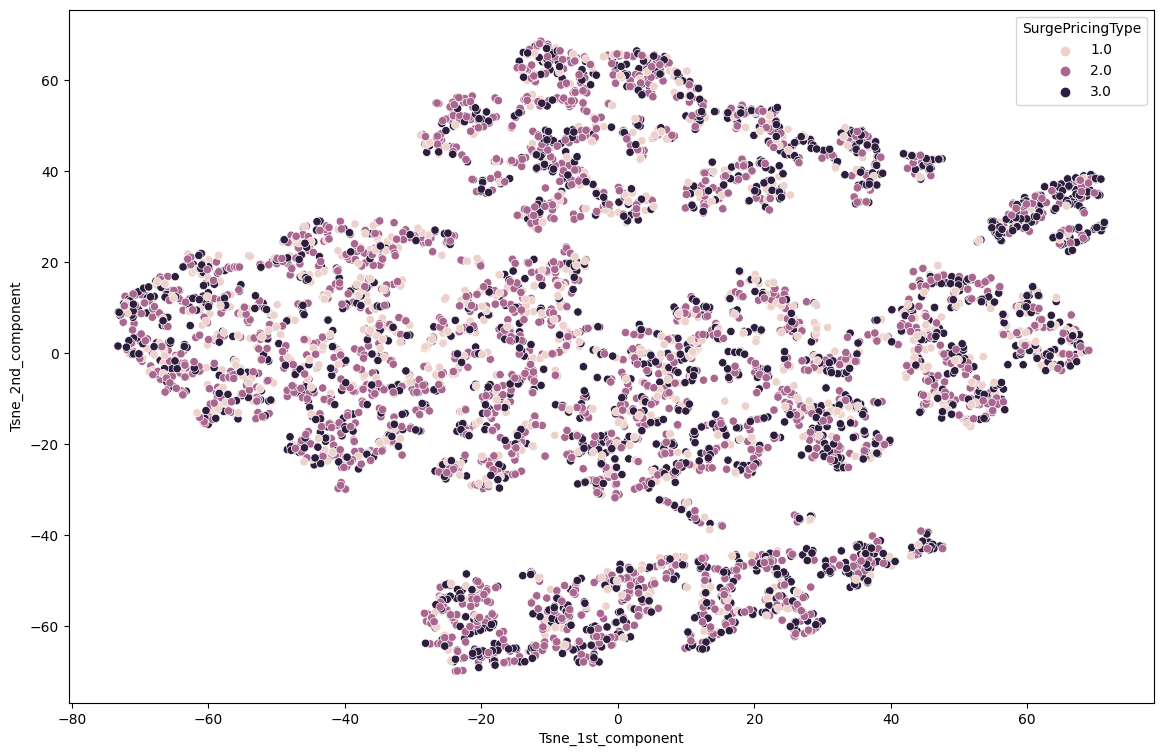

In [82]:
import seaborn as sns

fig = plt.figure()
fig.set_size_inches(14, 9)

colors = X_tsne_['SurgePricingType'].replace(['1', '2', '3'],
                                      ['orange', 'green', 'red'])

    
sns.scatterplot(data=X_tsne_, x="Tsne_1st_component", 
                y="Tsne_2nd_component", 
                hue='SurgePricingType', color=colors)

**Задание 7.** Обучите t-sne с `n_components=3` на изначальных данных и визуализируйте результаты с учетом известных классов.

In [70]:
### Your code is here

X_s_3d = X_.iloc[0:2000].copy()
y_s_3d = y_.iloc[0:2000].copy()


In [71]:
from sklearn.manifold import TSNE

X_tsne_3d = TSNE(n_components=3).fit_transform(X_s_3d)
X_tsne_3d

array([[-7.3895907, -7.279451 ,  7.8390293],
       [-2.160342 , -4.889351 ,  7.3461304],
       [-0.9621818, -2.4327486, -2.631818 ],
       ...,
       [-4.368798 , -2.8683262,  8.625794 ],
       [-5.64147  , 11.120838 , -1.2461249],
       [-0.534269 , -3.0561907, -8.960209 ]], dtype=float32)

In [72]:
### Преобразуем в pd.DataFrame

X_tsne_3d_ = np.concatenate((X_tsne_3d, y_s_3d.values.reshape(-1, 1)),
                        axis=1)
X_tsne_3d_ = pd.DataFrame(X_tsne_3d_, columns = ['Tsne_1st_component',
                              'Tsne_2nd_component',
                              'Tsne_3rd_component',
                              'SurgePricingType'])
X_tsne_3d_

,Tsne_1st_component,Tsne_2nd_component,Tsne_3rd_component,SurgePricingType
0,-7.389591,-7.279451,7.839029,2.0
1,-2.160342,-4.889351,7.346130,2.0
2,-0.962182,-2.432749,-2.631818,2.0
3,7.697828,-4.112330,-3.933898,3.0
4,4.020492,-1.671996,2.171768,2.0
...,...,...,...,...
1995,14.395590,0.939047,0.940513,3.0
1996,-0.737611,-2.803648,-7.230451,3.0
1997,-4.368798,-2.868326,8.625794,2.0
1998,-5.641470,11.120838,-1.246125,2.0


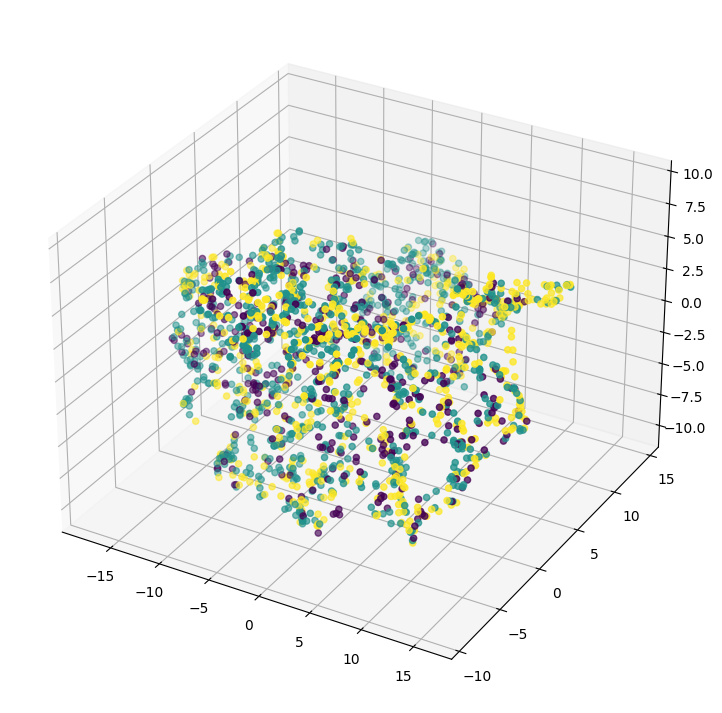

In [74]:
fig = plt.figure()
fig.set_size_inches(14, 9)

ax = plt.axes(projection='3d')

colors = X_tsne_3d_['SurgePricingType'].replace(['1', '2', '3'],
                                      ['orange', 'green', 'red'])

ax.scatter3D(X_tsne_3d_['Tsne_1st_component'], 
             X_tsne_3d_['Tsne_2nd_component'],
             X_tsne_3d_['Tsne_3rd_component'], 
             c=colors)

Советуем обрезать датасет до маленького числа объектов (чтобы точки и их группки были хорошо различимы) и поиграться с гиперпараметрами класса Tsne! Обычно такая "игра" может привести к куда более красивым результатам по сравнению с теми, что получены с дефолтными настройками!